In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import ODR, Model, RealData

In [143]:
def linear_regression(x, y, err):
    s1 = np.sum(1/(err**2))
    sx = np.sum(x/(err**2))
    sy = np.sum(y/(err**2))
    sxx = np.sum(x**2/(err**2))
    sxy = np.sum(x*y/(err**2))

    d = s1*sxx-sx*sx
    v = np.array([[sxx, -sx], [-sx, s1]])/d

    a = (sy*sxx-sx*sxy)/d
    b = (s1*sxy-sx*sy)/d
    sig_a = np.sqrt(v[0][0])
    sig_b = np.sqrt(v[1][1])

    return (a, sig_a, b, sig_b, v)

In [144]:
def f(B, x):
    return B[1]*x + B[0]

In [145]:
#importing data
df = pd.read_csv('prova2.csv')
df


FileNotFoundError: [Errno 2] No such file or directory: 'prova2.csv'

In [ ]:
v = np.array(df['Tensione (V) per 0.14']).astype(float)
i = np.array(df['Corrente (mA) per 0.14']).astype(float)

di = np.array(df['errore i 0.14']).astype(float)
dv = np.array(df['errore v 0.14']).astype(float)

/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_67996/1401452058.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v, i,xerr= dv, yerr=di, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)


<ErrorbarContainer object of 3 artists>

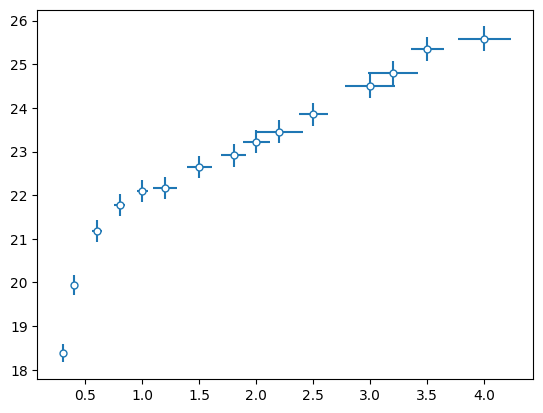

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(v, i,xerr= dv, yerr=di, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)

In [ ]:
linear = Model(f)
mydata = RealData(v, i, sx=dv, sy=di)
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()


In [ ]:
myoutput.pprint()

Beta: [19.3869401   1.84654964]
Beta Std Error: [0.37916751 0.23105208]
Beta Covariance: [[ 0.01930689 -0.00954082]
 [-0.00954082  0.00716919]]
Residual Variance: 7.446461338400682
Inverse Condition #: 0.27964667614578886
Reason(s) for Halting:
  Sum of squares convergence


/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_67996/1014765706.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v, i, yerr=err_i, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)


<ErrorbarContainer object of 3 artists>

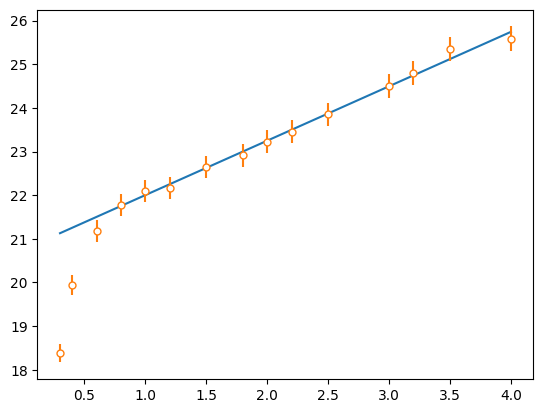

In [ ]:
a,da,b,db,cov = linear_regression(v[:v.size-3],i[:v.size-3],err_i[:v.size-3])
fig, ax = plt.subplots()
ax.plot(v,a+b*v, label = 'fit')
ax.errorbar(v, i, yerr=err_i, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)

In [ ]:
v_2 = np.array(df['Tensione (V) per 0.07']).astype(float)
i_2 = np.array(df['Corrente (mA) per 0.07']).astype(float)

di_2 = np.array(df['errore i 0.07']).astype(float)
dv_2 = np.array(df['errore v 0.07']).astype(float)

/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_67996/3645325892.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v, i, yerr=err_i, fmt="o", marker = '.', markerfacecolor='white', markersize=10, label = '0.14')
/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_67996/3645325892.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v_2, i_2, yerr=err_i_2, fmt="o", marker = '.', markerfacecolor='white', markersize=10, label = '0.07')


(0.0, 30.0)

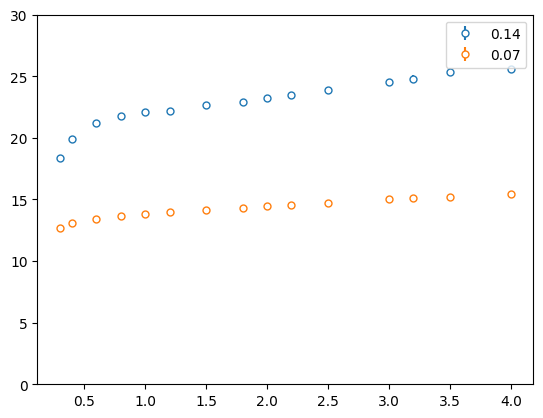

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(v, i, yerr=err_i, fmt="o", marker = '.', markerfacecolor='white', markersize=10, label = '0.14')
ax.errorbar(v_2, i_2, yerr=err_i_2, fmt="o", marker = '.', markerfacecolor='white', markersize=10, label = '0.07')
plt.legend()
ax.set_ylim([0, 30])

In [ ]:
linear_regression(v_2,i_2,err_i_2)

(12.978139897604825,
 0.08227642472720124,
 0.677457132426555,
 0.03923017269830621,
 array([[ 0.00676941, -0.00271762],
        [-0.00271762,  0.00153901]]))

/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_67996/1908769043.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v_2, i_2, yerr=err_i_2, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)


<ErrorbarContainer object of 3 artists>

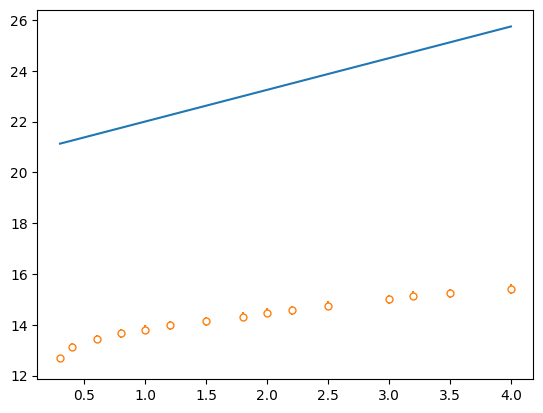

In [ ]:
a_2,da_2,b_2,db_2,cov_2 = linear_regression(v_2[:v_2.size-3],i_2[:v_2.size-3],err_i_2[:v_2.size-3])
fig, ax = plt.subplots()
ax.plot(v_2,a+b*v_2, label = 'fit')
ax.errorbar(v_2, i_2, yerr=err_i_2, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)

In [ ]:
#printing parameters:
g = 1/b
dg = db*(1/(b**2))

beta = 

g_2 = 1/b_2
dg_2 = db_2*(1/(b_2**2))

SyntaxError: invalid syntax (2864583877.py, line 5)